In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

(-1, 1)

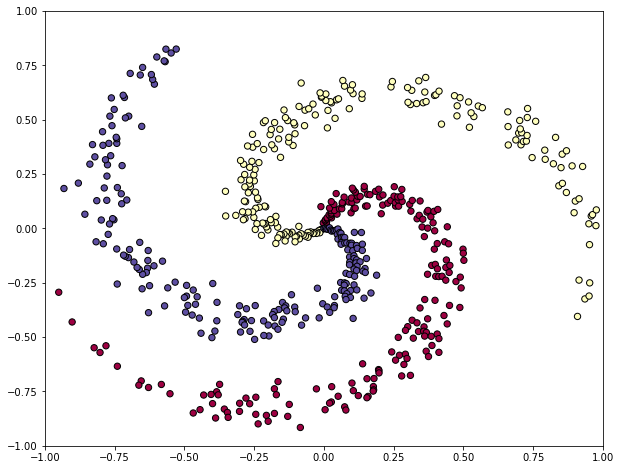

In [2]:
np.random.seed(0)
N = 200 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k',cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [114]:
# Training a linear classifer with cross entropy loss
# Data and parameter structures : X (data set) -> NxD (each row is a sample); W (weights) -> DxK (K is the number of classes);
# b (bias vector) -> 1xK; y (labels) -> contains the index of the true class
# Scores f are computed as transpose(W).X + b
# Steps (without cross validation, hyper parameter tuning and other bells and whistles)
# Step 1 : Because of the way the datset was created it is better to shuffle the data so that consecutive samples are less likely
# to be of the same class
# Step 2 : Split into training and validation sets (not needed if cross validation is beign performed)
# Step 3 : Scale/normalize data
# Step 4 : Initialize parameters randomly

# next steps are inside the gradient descent loop
# Step 5 : Compute scores, class probabilities, and compute the cross entropy loss using the scores while saving the loss at 
# each step
# Step 6 : Compute the gradient of the loss with respect to the parameters W and b
# Step 7 : Use loss gradient to update parameters

# loop ends
# Step 8 : once stopping criterion reached, plot loss against iterations
# Step 9 : Use trained parameters to predict labels in the training set and/or validation set and get accuracy

In [3]:
# Step 1
random_index = np.random.permutation(X.shape[0])
X_shuffled = X[random_index,:]
y_shuffled = y[random_index]
print X.shape, X_shuffled.shape, y_shuffled.shape

(600L, 2L) (600L, 2L) (600L,)


In [4]:
# Step 2
X_train, y_train = X_shuffled[:450,:], y_shuffled[:450]
X_val, y_val = X_shuffled[450:,:], y_shuffled[450:]
print X_train.shape, y_train.shape, X_val.shape, y_val.shape

(450L, 2L) (450L,) (150L, 2L) (150L,)


In [5]:
# Step 3
X_scaled = (X_train - np.mean(X_train,axis = 0))/np.std(X_train,axis = 0)
X_val_scaled = (X_val - np.mean(X_train,axis = 0))/np.std(X_train,axis = 0)
num_examples = X_scaled.shape[0]
print X_scaled.shape

(450L, 2L)


In [6]:
# Step 4
W = 0.01*np.random.randn(D,K)
b = np.zeros((1,K))
# Hyperparameters
learning_rate = 0.5
reg = 1e-3 # regularization strength

In [12]:
scores = np.dot(X_scaled,W) + b # num_examples x K matrix
    # class probabilites
true_class_scores = scores[range(num_examples), y_train]
true_class_scores1 = true_class_scores.reshape(-1,1)
print scores.shape, true_class_scores.shape, true_class_scores1.shape
res = scores - true_class_scores1 + 1.0

(450L, 3L) (450L,) (450L, 1L)


Loss in iteration 0 is 1.1054
Loss in iteration 100 is 0.7200
Loss in iteration 200 is 0.7200
Loss in iteration 300 is 0.7200
Loss in iteration 400 is 0.7200


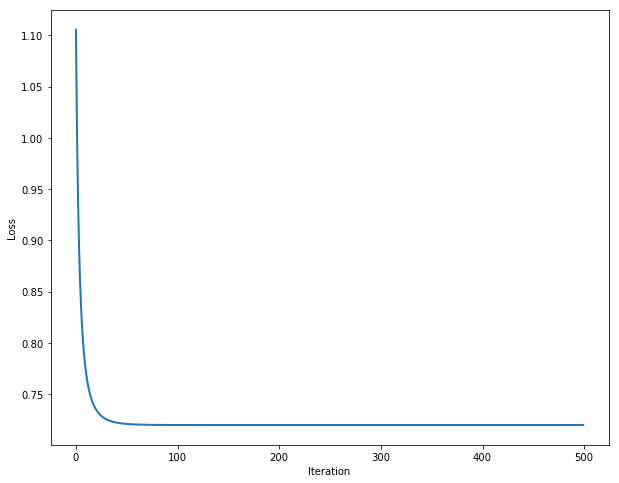

In [119]:
# Gradient descent loop

L_accu = []
num_iter = 500
for ii in xrange(num_iter):
    
    # Step 5
    # class scores
    scores = np.dot(X_scaled,W) + b # num_examples x K matrix
    # class probabilites
    prob = np.exp(scores)/np.sum(np.exp(scores),axis = 1, keepdims =  True) # num_examples x K matrix, each row sums to 1
    # negative log probability of true class
    true_class_neglogprob = -np.log(prob[range(num_examples), y_train])
    # total data loss
    data_loss = np.sum(true_class_neglogprob)/num_examples
    # total regularization loss
    reg_loss = 0.5*reg*np.sum(W*W) # L2 regularization
    # total loss 
    L = data_loss + reg_loss
    L_accu.append(L)
    
    if ii%100 ==0:
        print 'Loss in iteration %d is %.4f' %(ii, L)
        
    # Step 6
    
    # data loss is function of scores, which in turn is function of the parameters W and b
    # gradient of data loss with respect to scores. Note scores was  num_examples x K matrix. so gradient of loss with respect 
    # to L also has to be a num_examples x K matrix
    dL_scores = prob
    # at the indices of the correct classes we need to subtract 1 from the probabilities (check derivative of loss with repsect
    # to scores)
    dL_scores[range(num_examples),y_train] -=1 # num_examples x K matrix
    dL_scores /= num_examples
    
    # gradient of data loss with respect to the parameters using chain rule
    # note the gradient with respect to W and b must be of the same size as W and b
    
    dL_W = np.dot(X_scaled.T, dL_scores) # DxK matrix
    dL_b = np.dot(np.ones((1,num_examples)),dL_scores) # 1xK matrix
    
    # Gradient of regularization loss. Note this is a function of W only. We do not regularize the bias terms
    
    dL_reg = reg*W
    dL_W += dL_reg
    
    # Step 7 
    W -= learning_rate*dL_W
    b -= learning_rate*dL_b       
    
# Step 8
fig = plt.figure()
plt.plot(range(num_iter), L_accu, lw = 2)
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [120]:
# Step 9

scores_trainset = np.dot(X_scaled,W) + b
pred_trainset = np.argmax(scores_trainset,axis = 1)
print 'Train set accuracy is: %.2f' % (np.mean(pred_trainset==y_train))

scores_valset = np.dot(X_val_scaled,W) + b
pred_valset = np.argmax(scores_valset,axis = 1)
print 'Validation set accuracy is: %.2f' % (np.mean(pred_valset==y_val))

Train set accuracy is: 0.54
Validation set accuracy is: 0.50


In [121]:
# Training a 3 layer neural network with cross entropy loss
# Data and parameter structures : X (data set) -> NxD (each row is a sample); 
# h1 = number of neurons in hidden layer 1
# h2 = number of neurons in hidden layer 2
# W1 (weight matrix of hidden layer 1) -> Dxh1
# b1 (bias of hidden layer 1) -> 1xh1
# W2 (weight matrix of hidden layer 2) -> h1xh2
# b2 (bias of hidden layer 2) -> 1xh2
# W3 (weight matrix of output layer 2) -> h2xK
# b3 (bias of hidden layer 2) -> 1xK
# Scores f are computed as transpose(W).X + b
# Steps (without cross validation, hyper parameter tuning and other bells and whistles)
# Step 1 : Because of the way the datset was created it is better to shuffle the data so that consecutive samples are less likely
# to be of the same class
# Step 2 : Split into training and validation sets (not needed if cross validation is beign performed)
# Step 3 : Scale/normalize data
# Step 4 : Initialize parameters randomly

# next steps are inside the gradient descent loop
# Step 5 : Compute scores, class probabilities, and compute the cross entropy loss using the scores while saving the loss at 
# each step
# Step 6 : Compute the gradient of the loss with respect to the parameters W and b (this is the only step that is different from 
# that of the linear classifier since we have to perform back propagation through multiple layers and the node outputs are not 
# just linear transformations but they pass through activation functions)
# Step 7 : Use loss gradient to update parameters

# loop ends
# Step 8 : once stopping criterion reached, plot loss against iterations
# Step 9 : Use trained parameters to predict labels in the training set and/or validation set and get accuracy

In [122]:
# Step 4
h1 = 50
h2 = 50
W1 = 0.01*np.random.randn(D,h1)
b1 = np.zeros((1,h1))
W2 = 0.01*np.random.randn(h1,h2)
b2 = np.zeros((1,h2))
W3 = 0.01*np.random.randn(h2,K)
b3 = np.zeros((1,K))
# Hyperparameters
learning_rate = 0.5
reg = 1e-3 # regularization strength

Loss in iteration 0 is 1.099
Loss in iteration 50 is 1.099
Loss in iteration 100 is 1.098
Loss in iteration 150 is 1.092
Loss in iteration 200 is 0.757
Loss in iteration 250 is 0.628
Loss in iteration 300 is 0.603
Loss in iteration 350 is 0.462
Loss in iteration 400 is 0.194
Loss in iteration 450 is 0.154


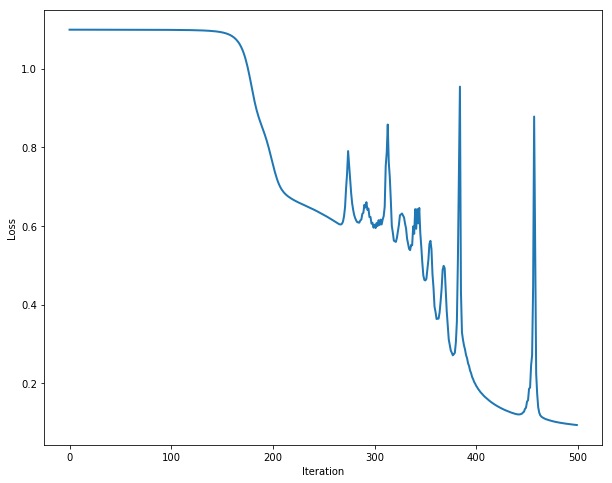

In [124]:
# Gradient descent loop

L_net_accu = []
num_iter = 500
for ii in xrange(num_iter):
    
    # Step 5
    # forward pass to compute class scores
    H1_b4_relu = np.dot(X_scaled,W1) + b1 # num_examples x h1 matrix
    H1 = np.maximum(0,H1_b4_relu) # num_examples x h1 matrix
    
    H2_b4_relu = np.dot(H1,W2) + b2 # num_examples x h2 matrix
    H2 = np.maximum(0,H2_b4_relu) # num_examples x h2 matrix
    
    scores = np.dot(H2,W3) + b3 # num_examples x K matrix
    prob = np.exp(scores)/np.sum(np.exp(scores),axis = 1, keepdims = True) # num_examples x K matrix
    true_class_neglogprob = -np.log(prob[range(num_examples), y_train])
    data_loss = np.sum(true_class_neglogprob)/num_examples
    reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2) + 0.5*reg*np.sum(W3*W3)
    # total loss
    L_net = data_loss + reg_loss
    L_net_accu.append(L_net)
    
    if ii%50==0:
        print 'Loss in iteration %d is %.3f' %(ii,L_net)
        
    # Step 6
    dL_scores = prob 
    dL_scores[range(num_examples),y_train] -= 1
    dL_scores /= num_examples # num_examples x K matrix
    
    #output layer
    dL_W3 = np.dot(H2.T, dL_scores) # h2xK matrix # using chain rule
    dL_b3 = np.dot(np.ones((1,num_examples)), dL_scores) # 1xK
    
    # second hidden layer
    dL_H2 =  np.dot(dL_scores, W3.T)   # num_examples x h2 matrix
    dL_H2[H2_b4_relu < 0] = 0.0 # taking care of the ReLu unit, note that ReLu unit passes on the gradient if the activatio is 
    # positive else clips the gradient to 0
    dL_H2_b4_relu = dL_H2 # this is the derivative of the loss with respect to the activation signal to the second layer ReLu
    dL_W2 = np.dot(H1.T, dL_H2_b4_relu) # h1xh2
    dL_b2 = np.dot(np.ones((1,num_examples)), dL_H2_b4_relu) # 1xh2
    
    # first hidden layer
    dL_H1 =  np.dot(dL_H2_b4_relu, W2.T)   # num_examples x h1 matrix
    dL_H1[H1_b4_relu < 0] = 0.0 
    dL_H1_b4_relu = dL_H1 
    dL_W1 = np.dot(X_scaled.T, dL_H1_b4_relu) # Dxh1
    dL_b1 = np.dot(np.ones((1,num_examples)), dL_H1_b4_relu) # 1xh1
    
    
    # Step 7
    W1 -= learning_rate*dL_W1
    b1 -= learning_rate*dL_b1
    W2 -= learning_rate*dL_W2
    b2 -= learning_rate*dL_b2  
    W3 -= learning_rate*dL_W3
    b3 -= learning_rate*dL_b3  

# Step 8
fig = plt.figure()
plt.plot(range(num_iter), L_net_accu, lw = 2)
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [126]:
# Step 9

H1_b4_relu = np.dot(X_scaled,W1) + b1 
H1 = np.maximum(0,H1_b4_relu) 
    
H2_b4_relu = np.dot(H1,W2) + b2
H2 = np.maximum(0,H2_b4_relu)
    
scores_trainset = np.dot(H2,W3) + b3

pred_trainset = np.argmax(scores_trainset,axis = 1)
print 'Train set accuracy is: %.2f' % (np.mean(pred_trainset==y_train))




H1_b4_relu = np.dot(X_val_scaled,W1) + b1 
H1 = np.maximum(0,H1_b4_relu) 
    
H2_b4_relu = np.dot(H1,W2) + b2
H2 = np.maximum(0,H2_b4_relu)
    
scores_valset = np.dot(H2,W3) + b3

pred_valset = np.argmax(scores_valset,axis = 1)
print 'Validation set accuracy is: %.2f' % (np.mean(pred_valset==y_val))

Train set accuracy is: 1.00
Validation set accuracy is: 0.97
